In [31]:
using PyPlot
using MAT
using LinearAlgebra
using Random

using Revise
using CMF

**Load data**

In [2]:
folder = "/home/asd/data/mouse/"

# Load accelerometer data
mdict_agg = matread(folder * "agg.mat")
mdict_agg = mdict_agg["agg_unitstructure"]
acc = mdict_agg["acc_full"]
acc_sum = mdict_agg["acc"]

# Load labels
# TODO

println("Done")

Done


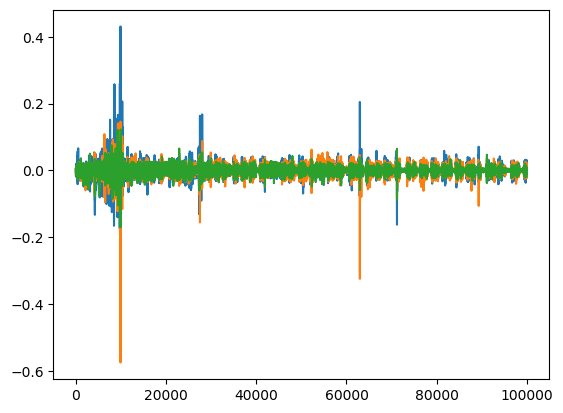

size(acc) = (3, 19980000)


3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fed896cccd0>
 PyObject <matplotlib.lines.Line2D object at 0x7fed896d6a50>
 PyObject <matplotlib.lines.Line2D object at 0x7fed896d6c10>

In [3]:
@show size(acc)
plt.plot(acc[:, 1:100_000]')

**Fit data**

To make this work, we need to finish a few things
- Add masking
- Support negative data / factorizations (or rather partially nonnegative)
    - Quick fix: normalize to be between 0 and 1
- ??? Make everything in place to prevent OOM errors

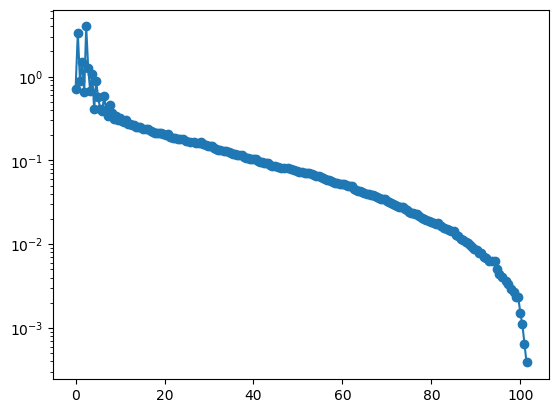

results.loss_hist[end] = 0.27952857057938996
size(results.loss_hist) = (201,)


(201,)

In [62]:
# Goal: full dataset 19_980_000
data = acc[:, 1:100_000]

N, T = size(data)
L, K = 30, 13
results = fit_cnmf(
    data; 
    L=L, K=K,
    constrW=nothing,
    penaltiesW=[CMF.SquarePenalty( 1e-5*sqrt(T) )],
    penaltiesH=[CMF.AbsolutePenalty(1/K)],
    
    alg=PGDUpdate, 
    max_itr=200,
    tol=1e-4,
    max_time=120,
    patience=5,
    seed=47,
)

normalized_loss_hist = results.loss_hist .- minimum(results.loss_hist)
plt.plot(results.time_hist[1:end-1], normalized_loss_hist[1:end-1], marker="o")
plt.yscale("log")
@show results.loss_hist[end]
@show size(results.loss_hist)

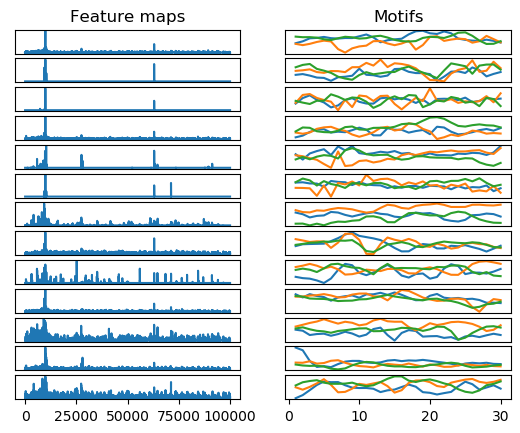

maximum([norm(results.W[k, :, :]) for k = 1:K]) = 12.50706669722781
sum(results.H .> 0.0001) / length(results.H) = 0.06565461538461538
sum(results.H .> 0.0001) = 85351


85351

In [63]:
plt.figure()
for k in 1:K
    plt.subplot(K, 2, 2*k-1)
    plt.plot(results.H[k, :]')
    plt.yticks([])
    k != K && plt.xticks([])
    k == 1 && plt.title("Feature maps")
    
    
    plt.subplot(K, 2, 2*k)
    plt.plot(1:L, results.W[k, :, :]')
    plt.yticks([])
    k != K && plt.xticks([])
    k == 1 && plt.title("Motifs")
end

@show maximum([norm(results.W[k, :, :]) for k = 1:K])
@show sum(results.H .> 1e-4) / length(results.H)
@show sum(results.H .> 1e-4)